## imports

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# https://matplotlib.org/stable/gallery/color/named_colors.html

In [86]:
df = pd.read_csv('../temp/demotermine_cleaned_2022_06_20.csv', parse_dates=['date', 'edit_date'])

In [87]:
len(df)

27452

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27452 entries, 0 to 27451
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0.1         27452 non-null  int64         
 1   Unnamed: 0           27452 non-null  int64         
 2   channel_name         27452 non-null  object        
 3   channel_id           27452 non-null  int64         
 4   channel_description  27452 non-null  object        
 5   message_id           27452 non-null  int64         
 6   from_id              0 non-null      float64       
 7   via_bot_id           4 non-null      float64       
 8   date                 27452 non-null  datetime64[ns]
 9   edit_date            26401 non-null  datetime64[ns]
 10  text                 27452 non-null  object        
 11  forwards             27452 non-null  float64       
 12  fwd_from             1428 non-null   object        
 13  replies              24460 non-

## date range of messages

In [89]:
print("First message in dataset: ", min(df.date.values))

First message in dataset:  2018-11-03T13:08:53.000000000


In [90]:
print("Last message in dataset: ", max(df.date.values))

Last message in dataset:  2021-12-19T08:35:11.000000000


## message distribution over time

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27452 entries, 0 to 27451
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0.1         27452 non-null  int64         
 1   Unnamed: 0           27452 non-null  int64         
 2   channel_name         27452 non-null  object        
 3   channel_id           27452 non-null  int64         
 4   channel_description  27452 non-null  object        
 5   message_id           27452 non-null  int64         
 6   from_id              0 non-null      float64       
 7   via_bot_id           4 non-null      float64       
 8   date                 27452 non-null  datetime64[ns]
 9   edit_date            26401 non-null  datetime64[ns]
 10  text                 27452 non-null  object        
 11  forwards             27452 non-null  float64       
 12  fwd_from             1428 non-null   object        
 13  replies              24460 non-

In [92]:
%matplotlib inline

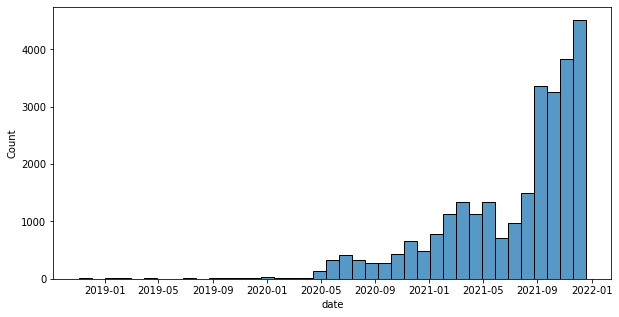

In [93]:
plt.figure(figsize=(10,5))
sns.histplot(data=df.date, legend=True, bins=39)
plt.savefig('../../../thesis/images/message_count.png')
plt.show()

In [94]:
before_pandemic = df[(df['date'] < '2020-03')]

In [95]:
len(before_pandemic)

188

In [96]:
before_pandemic.to_csv('../temp/msgs_before_pandemic.csv')

In [97]:
for i in before_pandemic.index:
    print(i)
    print(before_pandemic.at[i, 'date'])
    print(before_pandemic.at[i, 'cleaned_text'])

82
2019-01-22 10:37:07
Alle Streams jetzt aus Aachen
99
2018-11-10 14:22:32
Die Demos der Partei AfD findet ihr gesondert in der AfD-Gruppe .
190
2018-11-25 12:41:43
Nächsten Samstag geht es weiter ! Auch am 01.12. stehen Deutsche und Franzosen zusammen . Ab 09 Uhr in Lauterbourg ( Frankreich ) und ab 14 Uhr im 13 km entfernten Kandel ( Deutschland ) . Samedi prochain , nous allons continuer ! L'allemand et le français se réuniront également le 1er décembre . De 09am à Lauterbourg ( France ) et de 14h à Kandel ( Allemagne ) .
297
2018-12-01 07:47:23
Zur besseren Übersicht zeigen wir auch die anderen ...
367
2019-12-27 03:37:17
+ + + Weiterschicken ! + + + DEMO IN AUE + + + Sehr geehrte Mitbürger , aufgrund der jüngsten Entwicklung hinsichtlich des brutalen Überfalls einiger Araber auf eine Weihnachtsfeier an Heiligabend im Ortsteil Aue der Großen Kreisstadt Aue-Bad Schlema habe ich in meiner Eigenschaft als Stadtrat eine Kundgebung angemeldet . Diese wird am Samstag , 28. Dezem

## Text length

In [98]:
df.text_length.describe()

count    27452.000000
mean       272.333746
std        397.579191
min          1.000000
25%         78.000000
50%        138.000000
75%        319.000000
max       4166.000000
Name: text_length, dtype: float64

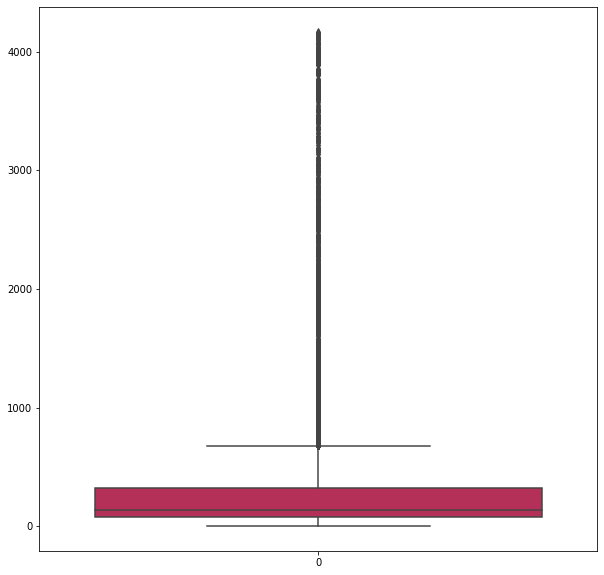

In [99]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.text_length, palette="rocket_r")
plt.savefig('../../../thesis/images/text_length_box.png')
plt.show()

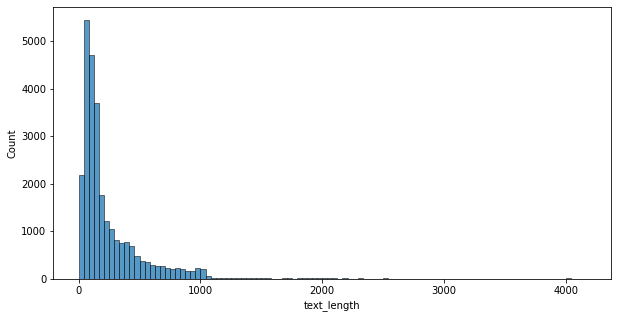

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(x=df.text_length, bins=100)
plt.savefig('../../../thesis/images/text_length_box.png')
plt.show()

# Languages

In [101]:
languages = pd.read_csv('../temp/language_count_2022_06_20.csv')

In [102]:
languages.rename(columns={'0': 'count'}, inplace=True)

In [103]:
languages.head()

lang  count
0   de  22803
1   en   3823
2   it    266
3   fr    210
4   nl    189

In [104]:
22803 / len(df) * 100

83.064986157657

In [105]:
languages['percentage'] = None

In [106]:
languages['percentage'] = languages['count'].apply(lambda x: x/len(df) *100)

In [107]:
languages.head()

lang  count  percentage
0   de  22803   83.064986
1   en   3823   13.926126
2   it    266    0.968964
3   fr    210    0.764972
4   nl    189    0.688474

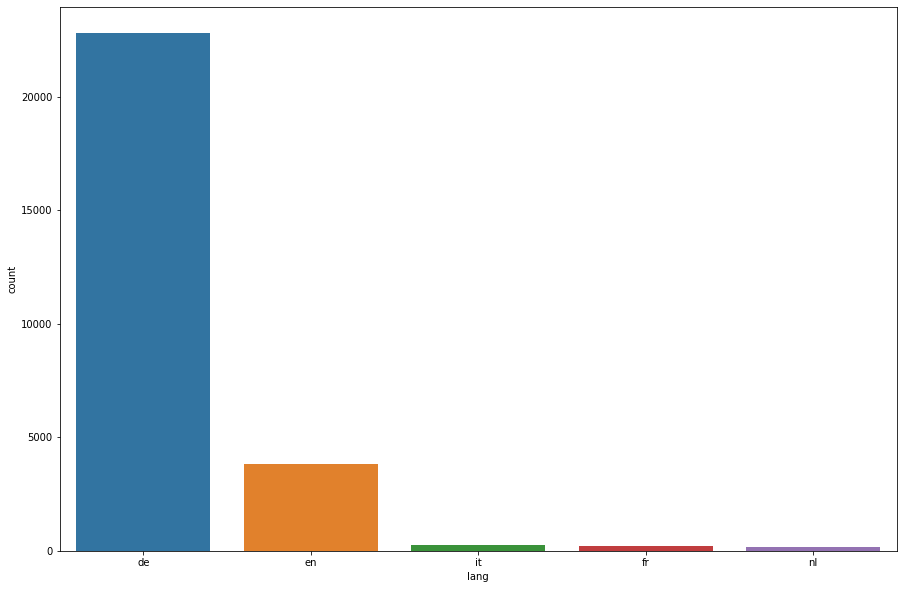

In [108]:
plt.figure(figsize=(15,10))
sns.barplot(x=languages[:5]['lang'], y=languages[:5]['count'])
plt.savefig('../../../thesis/images/languages.png')
plt.show()